**Import Required Libraries**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**Load and Inspect the Dataset**

In [15]:
data = pd.read_csv("austin_weather.csv")

print("Initial Data Info:")
print(data.info())
data.head()


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


**Data Cleaning**

In [18]:
data = data.drop(["Events", "Date", "SeaLevelPressureLowInches"], axis=1)

data = data.replace(['T', '-'], 0.0)

data = data.apply(pd.to_numeric, errors='coerce')

data = data.dropna()

data.to_csv("austin_weather_final.csv", index=False)


**Define Features and Target**

In [21]:
X = data.drop(['PrecipitationSumInches'], axis=1)
Y = data["PrecipitationSumInches"].values.reshape(-1, 1)

**Train Linear Regression Model**

In [24]:
model = LinearRegression()

model.fit(X, Y)

y_pred = model.predict(X)

print("R² Score:", r2_score(Y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y, y_pred)))


R² Score: 0.3045710521674254
RMSE: 0.35692973768478015


**Visualize Precipitation Over Time**

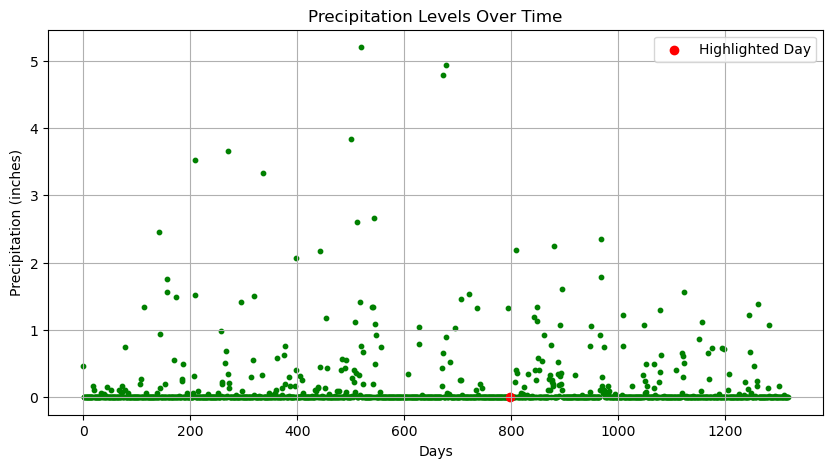

In [27]:
days = [i for i in range(len(Y))]
day_index = 798  

plt.figure(figsize=(10, 5))
plt.scatter(days, Y, color='green', s=10)
plt.scatter(days[day_index], Y[day_index], color='red', label="Highlighted Day")
plt.title("Precipitation Levels Over Time")
plt.xlabel("Days")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.grid(True)
plt.show()


**Visualize Trends with Weather Attributes**

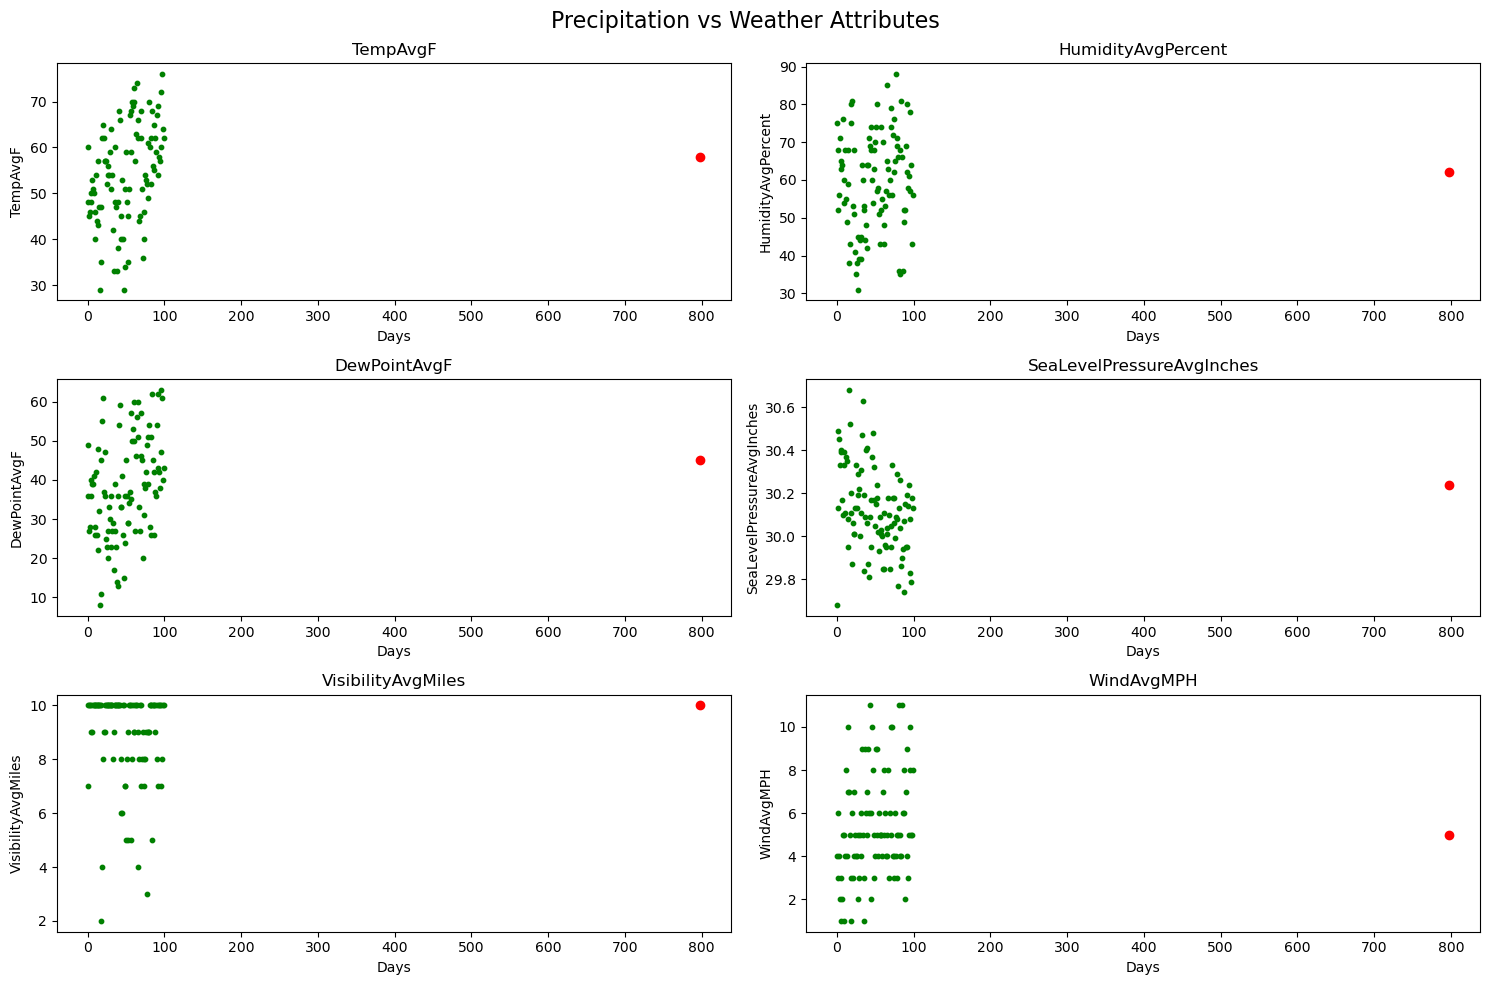

In [30]:
x_vis = X[["TempAvgF", "HumidityAvgPercent", "DewPointAvgF",
           "SeaLevelPressureAvgInches", "VisibilityAvgMiles", "WindAvgMPH"]]

plt.figure(figsize=(15, 10))
plt.suptitle("Precipitation vs Weather Attributes", fontsize=16)

for i in range(x_vis.shape[1]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days[:100], x_vis.iloc[:100, i], color='green', s=10)
    plt.scatter(day_index, x_vis.iloc[day_index, i], color='red')
    plt.title(x_vis.columns[i])
    plt.xlabel("Days")
    plt.ylabel(x_vis.columns[i])
    plt.tight_layout()

plt.show()
